In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

#Upload the Kaggle API credentials JSON file
files.upload()
%%capture
# Hidden Cell: This cell contains sensitive information
username = "your_username"
password = "your_password"


Saving kaggle.json to kaggle (2).json


UsageError: Line magic function `%%capture` not found.


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json #6 is permission to admin 0 is no permission for user and external user

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog
#Got to Kaggle dataset, go to more and copy API, add exclamation mark before pasting the API
# -d means creating the directory

 96% 209M/218M [00:01<00:00, 182MB/s]
100% 218M/218M [00:01<00:00, 136MB/s]


In [ ]:
!unzip cat-and-dog.zip -d cat-and-dog

Streaming output truncated to the last 5000 lines.
  inflating: cat-and-dog/training_set/training_set/cats/cat.3704.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3705.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3706.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3707.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3708.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3709.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.371.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3710.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3711.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3712.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3713.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3714.jpg  
  inflating: cat-and-dog/training_set/training_set/cats/cat.3715.jpg  
  inflating: cat-and-dog/tr

In [ ]:
#Create image array, label array.
#For the image array, I want all the images of cats and dogs.
#For label array, I want to assign 0 to cat image and 1 to dog image

import pandas as pd
import numpy as np
from glob import glob
import cv2
import os

#Define paths to your cat and dog image folders
cat_folder = 'cat-and-dog/training_set/training_set/cats/'
dog_folder = 'cat-and-dog/training_set/training_set/dogs/'

#Initialize lists to store images and labels
images = []
labels = []

#Load and preprocess cat images
for filename in os.listdir(cat_folder): #For-loop is for the filename cat_folder
  if filename.endswith('.jpg'): #For images having jpg file extension
      img = cv2.imread (os.path.join(cat_folder, filename))
      img = cv2.resize (img, (128,128)) #Resize the image to a common size
      images.append(img)
      labels.append(0) # 0 represents cats

#Load and preprocess dog images
for filename in os.listdir(dog_folder): #For-loop is for the filename dog_folder
  if filename.endswith('.jpg'): #For images having jpg file extension
      img = cv2.imread (os.path.join(dog_folder, filename))
      img = cv2.resize (img, (128,128)) #Resize the image to a common size
      images.append(img)
      labels.append(1) # 1 represents dogs

#Convert lists to Numpy arrays to arrange in proper index
images = np.array(images)
labels = np.array(labels)

In [ ]:
#Split the data into training (20%) and testing (80%) sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, = train_test_split (images, labels, test_size=0.2, random_state=42)

Relu

In [ ]:
#Creation of Neural Network Model (Input Layer, Hidden Layer, Output Layer)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (128, 128, 3)), #Input Layer
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'), #Hidden Layer
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'), #Hidden Layer
    layers.Dense(2, activation = 'softmax') #Output layer = 2 classes: cats and dogs
])

#Compile the model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 57600)             0         
                                                                 
 dense_10 (Dense)            (None, 64)               

In [ ]:
#Train the Model
history = model.fit(x_train, y_train, epochs = 10, batch_size = 32, validation_split = 0.2)

Epoch 1/10
161/161 [==============================] - 135s 818ms/step - loss: 10.0171 - accuracy: 0.5214 - val_loss: 0.7068 - val_accuracy: 0.5035
Epoch 2/10
161/161 [==============================] - 130s 807ms/step - loss: 0.6141 - accuracy: 0.6484 - val_loss: 0.7689 - val_accuracy: 0.5340
Epoch 3/10
161/161 [==============================] - 131s 812ms/step - loss: 0.4899 - accuracy: 0.7349 - val_loss: 0.8843 - val_accuracy: 0.5340
Epoch 4/10
161/161 [==============================] - 132s 821ms/step - loss: 0.3546 - accuracy: 0.8171 - val_loss: 1.2676 - val_accuracy: 0.5574
Epoch 5/10
161/161 [==============================] - 137s 852ms/step - loss: 0.2816 - accuracy: 0.8661 - val_loss: 1.6998 - val_accuracy: 0.5488
Epoch 6/10
161/161 [==============================] - 129s 805ms/step - loss: 0.2706 - accuracy: 0.8757 - val_loss: 1.5831 - val_accuracy: 0.5496
Epoch 7/10
161/161 [==============================] - 132s 822ms/step - loss: 0.2512 - accuracy: 0.8870 - val_loss: 1.8497 

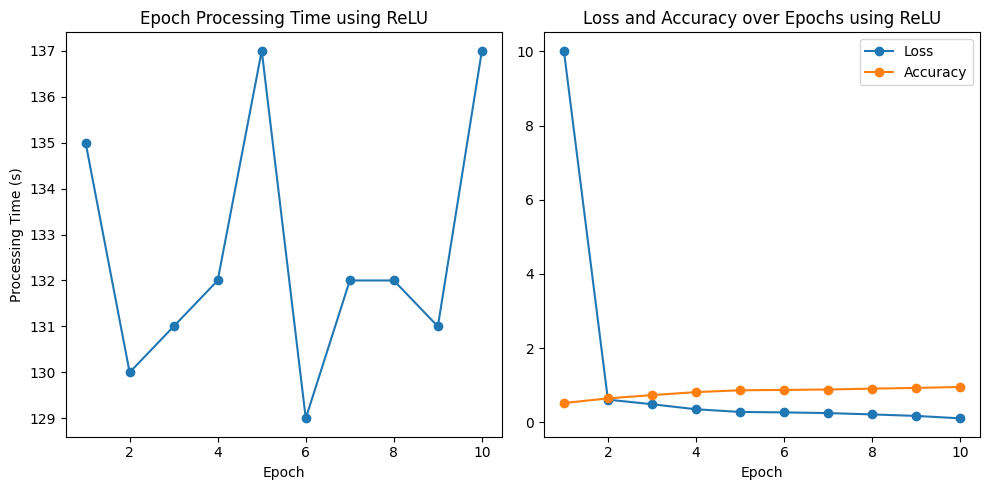

In [ ]:
import matplotlib.pyplot as plt

# Extract data from the training history
epochs = range(1, 11)
processing_time = [135, 130, 131, 132, 137, 129, 132, 132, 131, 137]  # Replace with your actual processing times
loss = [10.0171, 0.6141, 0.4899, 0.3546, 0.2816, 0.2706, 0.2512, 0.2159, 0.1753, 0.1099]  # Replace with your actual loss values
accuracy = [0.5214, 0.6484, 0.7349, 0.8171, 0.8661, 0.8757, 0.8870, 0.9110, 0.9297, 0.9553]  # Replace with your actual accuracy values

# Plotting the processing time
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, processing_time, marker='o')
plt.title('Epoch Processing Time using ReLU')
plt.xlabel('Epoch')
plt.ylabel('Processing Time (s)')

# Plotting the loss and accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, marker='o', label='Loss')
plt.plot(epochs, accuracy, marker='o', label='Accuracy')
plt.title('Loss and Accuracy over Epochs using ReLU')
plt.xlabel('Epoch')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()


In [ ]:
#Load and Save Method

In [ ]:
#Accuracy of Model 1 using "ReLU"
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 2)
print(f'Test accuracy: {test_acc}')

51/51 - 11s - loss: 2.9929 - accuracy: 0.5996 - 11s/epoch - 218ms/step
Test accuracy: 0.5996252298355103


Sigmoid

In [ ]:
#Creation of Neural Network Model (Input Layer, Hidden Layer, Output Layer)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation = 'sigmoid', input_shape = (128, 128, 3)), #Input Layer
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'sigmoid'), #Hidden Layer
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'sigmoid'), #Hidden Layer
    layers.Dense(2, activation = 'softmax') #Output layer = 2 classes: cats and dogs
])

#Compile the model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
#Train the Model
history = model.fit(x_train, y_train, epochs = 10, batch_size = 32, validation_split = 0.2)
#Bach size = Number of neurons in input layer
#161 = Input Neuron + Hidden Neuron + 1(Output)
#Accuracy is increasing while there is a change in processing time

Epoch 1/10
161/161 [==============================] - 146s 903ms/step - loss: 1.3812 - accuracy: 0.5040 - val_loss: 0.6936 - val_accuracy: 0.4910
Epoch 2/10
161/161 [==============================] - 143s 889ms/step - loss: 0.6942 - accuracy: 0.4798 - val_loss: 0.6933 - val_accuracy: 0.4910
Epoch 3/10
161/161 [==============================] - 149s 926ms/step - loss: 0.6940 - accuracy: 0.5048 - val_loss: 0.6944 - val_accuracy: 0.4910
Epoch 4/10
161/161 [==============================] - 140s 871ms/step - loss: 0.6937 - accuracy: 0.4985 - val_loss: 0.6932 - val_accuracy: 0.4910
Epoch 5/10
161/161 [==============================] - 142s 880ms/step - loss: 0.6937 - accuracy: 0.4995 - val_loss: 0.6932 - val_accuracy: 0.4910
Epoch 6/10
161/161 [==============================] - 143s 890ms/step - loss: 0.6938 - accuracy: 0.5116 - val_loss: 0.6932 - val_accuracy: 0.4910
Epoch 7/10
161/161 [==============================] - 142s 885ms/step - loss: 0.6942 - accuracy: 0.4882 - val_loss: 0.6930 -

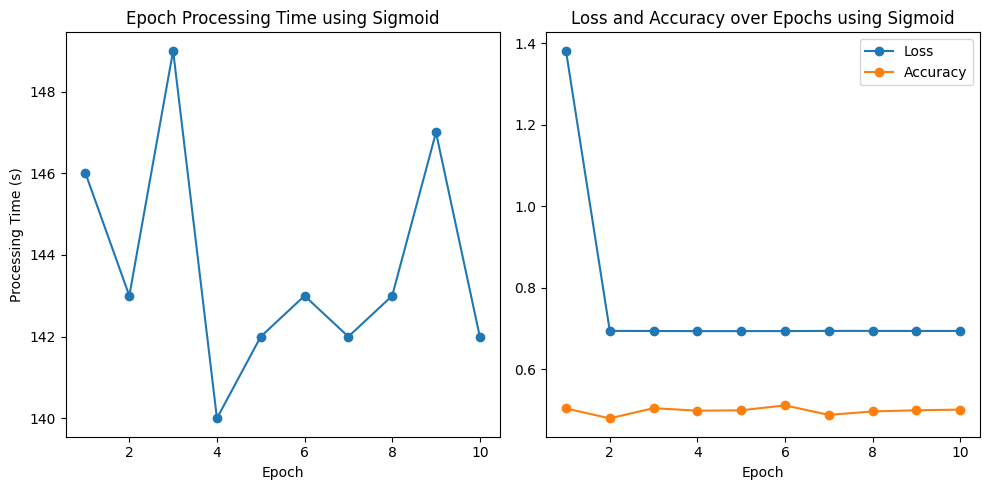

In [ ]:
import matplotlib.pyplot as plt

# Replace the placeholders with your actual data
epochs = range(1, 11)
processing_time = [146, 143, 149, 140, 142, 143, 142, 143, 147, 142]  # Replace with your actual processing times
loss = [1.3812, 0.6942, 0.6940, 0.6937, 0.6937, 0.6938, 0.6942, 0.6942, 0.6941, 0.6941]  # Replace with your actual loss values
accuracy = [0.5040, 0.4798, 0.5048, 0.4985, 0.4995, 0.5116, 0.4882, 0.4968, 0.4995, 0.5013]  # Replace with your actual accuracy values

# Plotting the processing time
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, processing_time, marker='o')
plt.title('Epoch Processing Time using Sigmoid')
plt.xlabel('Epoch')
plt.ylabel('Processing Time (s)')

# Plotting the loss and accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, marker='o', label='Loss')
plt.plot(epochs, accuracy, marker='o', label='Accuracy')
plt.title('Loss and Accuracy over Epochs using Sigmoid')
plt.xlabel('Epoch')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()


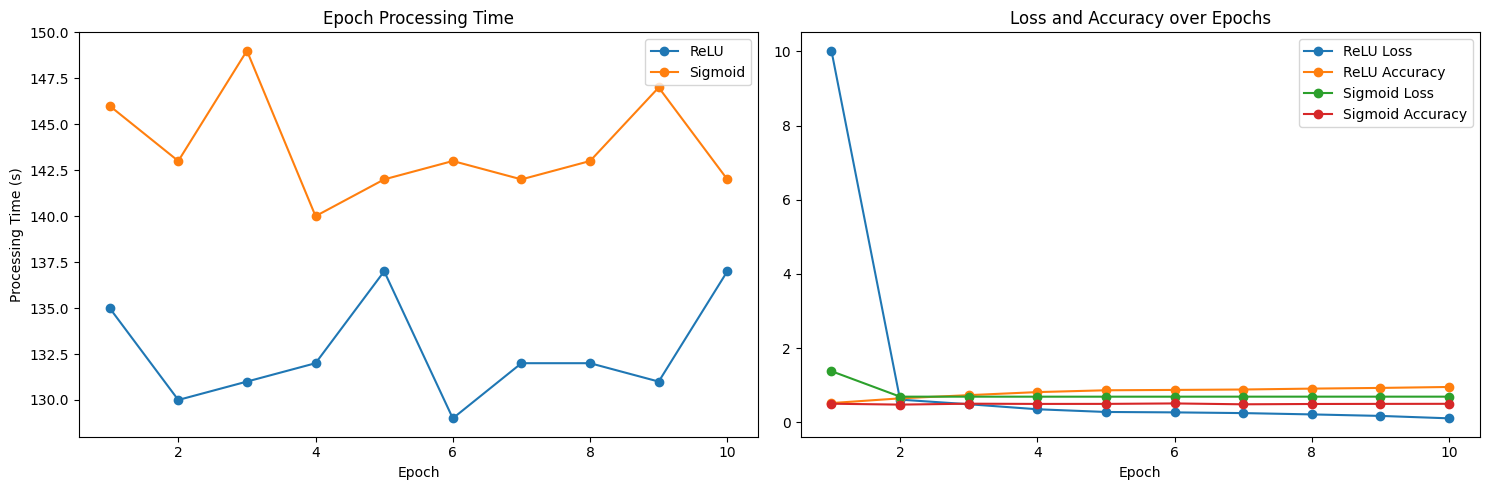

In [ ]:
import matplotlib.pyplot as plt

# Data for ReLU
epochs_relu = range(1, 11)
processing_time_relu = [135, 130, 131, 132, 137, 129, 132, 132, 131, 137]  # Replace with your actual processing times
loss_relu = [10.0171, 0.6141, 0.4899, 0.3546, 0.2816, 0.2706, 0.2512, 0.2159, 0.1753, 0.1099]  # Replace with your actual loss values
accuracy_relu = [0.5214, 0.6484, 0.7349, 0.8171, 0.8661, 0.8757, 0.8870, 0.9110, 0.9297, 0.9553]  # Replace with your actual accuracy values

# Data for Sigmoid
epochs_sigmoid = range(1, 11)
processing_time_sigmoid = [146, 143, 149, 140, 142, 143, 142, 143, 147, 142]  # Replace with your actual processing times
loss_sigmoid = [1.3812, 0.6942, 0.6940, 0.6937, 0.6937, 0.6938, 0.6942, 0.6942, 0.6941, 0.6941]  # Replace with your actual loss values
accuracy_sigmoid = [0.5040, 0.4798, 0.5048, 0.4985, 0.4995, 0.5116, 0.4882, 0.4968, 0.4995, 0.5013]  # Replace with your actual accuracy values

# Plotting Processing Time
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_relu, processing_time_relu, marker='o', label='ReLU')
plt.plot(epochs_sigmoid, processing_time_sigmoid, marker='o', label='Sigmoid')
plt.title('Epoch Processing Time')
plt.xlabel('Epoch')
plt.ylabel('Processing Time (s)')
plt.legend()

# Plotting Loss and Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_relu, loss_relu, marker='o', label='ReLU Loss')
plt.plot(epochs_relu, accuracy_relu, marker='o', label='ReLU Accuracy')
plt.plot(epochs_sigmoid, loss_sigmoid, marker='o', label='Sigmoid Loss')
plt.plot(epochs_sigmoid, accuracy_sigmoid, marker='o', label='Sigmoid Accuracy')
plt.title('Loss and Accuracy over Epochs')
plt.xlabel('Epoch')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()


In [ ]:
#Accuracy of Model 2 "Sigmoid"
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 2)
print(f'Test accuracy: {test_acc}')

51/51 - 11s - loss: 0.6930 - accuracy: 0.5116 - 11s/epoch - 218ms/step
Test accuracy: 0.5115552544593811


In [ ]:
#Test the Model
sample_image = x_test[3] #Replace with your image data
predictions = model.predict(np.expand_dims(sample_image, axis = 0))
predicted_label = np.argmax(predictions)

#Interpretation of the label using the dataset's class lables i.e. 0 for cats and 1 for dogs)
class_labels = ['cat', 'dog']
predicted_class = class_labels[predicted_label]
print(f'Predicted class: {predicted_class}')

1/1 [==============================] - 0s 35ms/step
Predicted class: dog


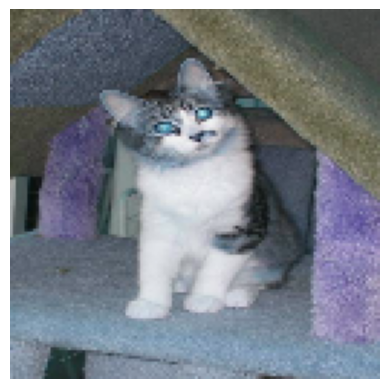

In [ ]:
import matplotlib.pyplot as plt

#Display sample image
plt.imshow(sample_image)
plt.axis ('off') #Turn off axis labels and ticks
plt.show()

In [ ]:
#Even if the accuracy is high, the result is not accurate.

In [ ]:
#Test the Model
sample_image = x_test[9] #Replace with your image data
predictions = model.predict(np.expand_dims(sample_image, axis = 0))
predicted_label = np.argmax(predictions)

#Interpretation of the label using the dataset's class lables i.e. 0 for cats and 1 for dogs)
class_labels = ['cat', 'dog']
predicted_class = class_labels[predicted_label]
print(f'Predicted class: {predicted_class}')

1/1 [==============================] - 0s 26ms/step
Predicted class: dog


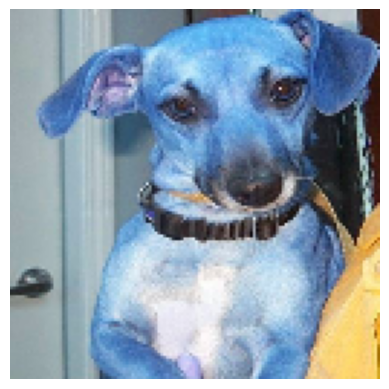

In [ ]:
import matplotlib.pyplot as plt

#Display sample image
plt.imshow(sample_image)
plt.axis ('off') #Turn off axis labels and ticks
plt.show()

In [ ]:
#Got to google and download the images of cats and dogs
